In [285]:
import numpy as np
from abc import ABC, abstractmethod

class LinearRegression(ABC):
    def __init__(self) -> None:
        pass
    
    @abstractmethod
    def fit(self, X:np.ndarray, y: np.ndarray):
        pass

    @abstractmethod
    def predict(self, X:np.ndarray, y: np.ndarray):
        pass

In [286]:
class LeastSquares(LinearRegression):
    def __init__(self):
        self.A = None

    # minimiza o erro quadrático total
    def fit(self, X:np.ndarray, y: np.ndarray):
        X = np.vstack([np.ones(len(X)), X]).T # matriz aumentada [1 | X]
        X_T = X.T
        self.A = np.linalg.inv(X_T @ X) @ X_T @ y
    
    def predict(self, X:np.ndarray):
        return self.A @ X

In [287]:
import matplotlib.pyplot as plt

class DataSet():
    def __init__(self) -> None:
        pass

    @staticmethod
    def generate():
        X = np.array([139, 126, 90, 144, 163, 136, 61, 62, 41, 120])
        y = np.array([122, 114, 86, 134, 146, 107, 68, 117, 71, 98])
        return X, y

    @staticmethod
    def plot(X:np.ndarray, y: np.ndarray, straight_fit=None):
        plt.scatter(X, y)
        if (straight_fit is not None):
            X_points = np.linspace(min(X), max(X), 1000)
            y_points = straight_fit[1] * X_points + straight_fit[0] # y = ax + b
            plt.plot(X_points, y_points, color='red', label='Reta de ajuste')
        plt.show()

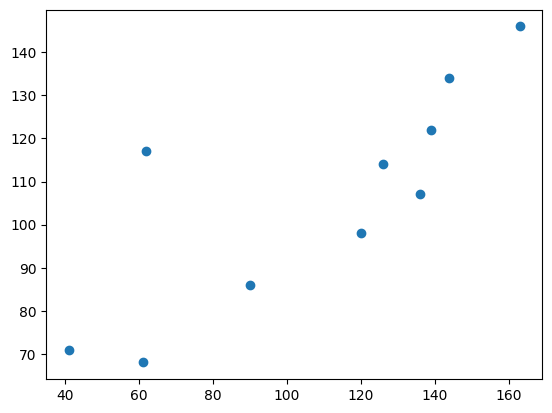

In [288]:
X, y = DataSet.generate()
DataSet.plot(X, y)

In [289]:
model = LeastSquares()
model.fit(X, y)
model.A

array([52.69296051,  0.49544399])

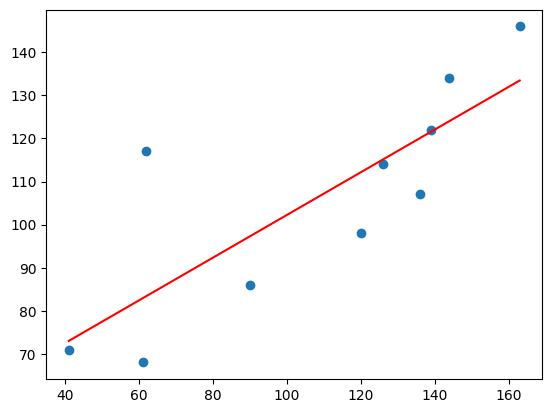

In [290]:
DataSet.plot(X, y, model.A)